In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dt = pd.read_csv('customer-churn.csv')

In [3]:
dt

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 01: Basic EDA ##

1. What are the columns and datatypes of each column ? 

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

2. What is distribution? 

In [7]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


__Observation:__
1. Maximium monthly charges is almost double of the mean. 
2. Minimum tenure is 0. (Which doesn't make sense)

In [9]:
dt.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,6921-OZMFH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


__Observation:__
1. For some weird reason total charges is object type (maybe include na)
2. Most of the categorical fields have 2-3 unique values. 

3.Which columns have missing/incorrect values? 

In [10]:
dt.columns[dt.isnull().any()]

Index([], dtype='object')

Removing empty space with NA.

In [20]:
dt['TotalCharges'] = dt['TotalCharges'].apply(lambda x: np.nan if x==' ' else x)

In [23]:
dt.columns[dt.isnull().any()]

Index(['TotalCharges'], dtype='object')

__Observation:__
1. Maximium monthly charges is almost double of the mean (looks bit odd)
2. Minimum tenure is 0. (Which doesn't make sense)
3. Total charge contain 11 missing values
4. Looks like Categorical variables have more approriate value based on the unique values in each field. 

4. What is the class distribution?

In [30]:
(dt['Churn'].value_counts()/len(dt))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## What are the assumptions to begin with? 

1. As the tenure increases client will be less likely to switch to other network because the longer tenure shows his/her statisfaction?
2. Senior Citizens are less likely to switch but they may have a strong association with necessary service? After all most of the citizen spend their time watching time. They won't probably care about DSL or anything else. 
3. High Monthly charges can likely trigger churn. Maybe some other provider is cheaper than it. 
4. Monthly contract might trigger churn. longer contract often leave no choice. 
5. Internet Service and Phone service are primary they can impact churn than other services. 
6. Payment type can have any impact on churn.


# Univariate and Bivariate Analysis

## Tenure:

1. What is distribution of it? 

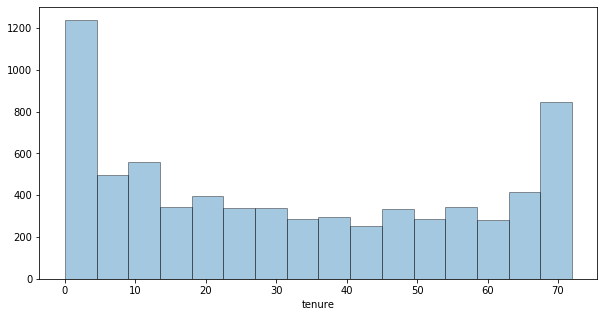

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(dt['tenure'],kde=False, hist_kws={'edgecolor':'Black'})

In [41]:
dt['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

__Observations:__
1. Unexpect spikes at the beginin.and end of the distribution suggest either most of the clients are new or very old.

2. What is Cumulative distribution of it?

In [52]:
tenure = dt['tenure'].sort_values()

In [53]:
p = 1. * np.arange(len(tenure)) / (len(tenure) - 1)

Text(0.5, 0, 'tenure')

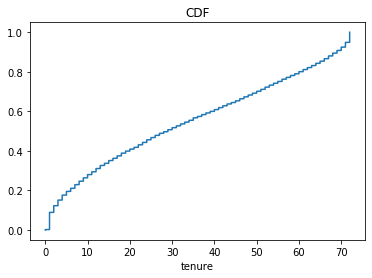

In [56]:
plt.plot(tenure,p)
plt.title('CDF')
plt.xlabel('tenure')

3. Tenure Vs Churn. 

In [66]:
agg = dt.groupby(by=['tenure','Churn'])['customerID'].count().reset_index().rename(columns={'customerID':'count'})

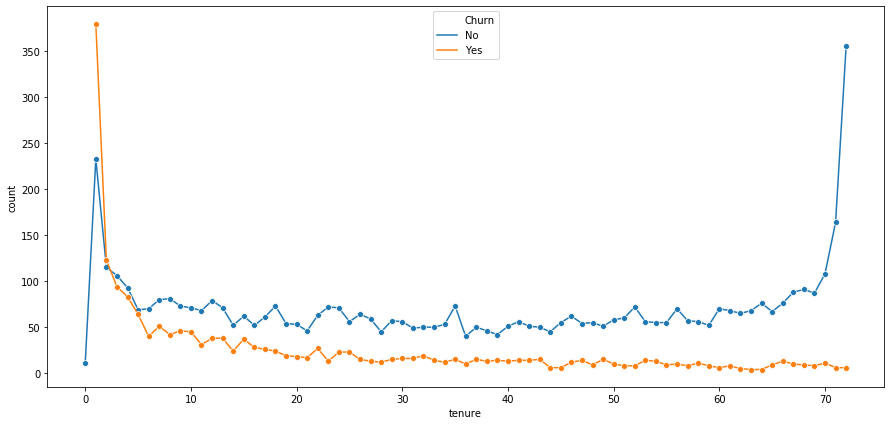

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x='tenure',y='count',hue='Churn',marker='o',data=agg)

__Observation:__
1. As suspected clients usually churn in the start of the tenure as they tenure increases churning often decline sharply. 
2. As of now we can say that if some is old customer they probably won't churn. 

## Senior Citizens

1. What is their distributions?

In [70]:
(dt['SeniorCitizen'].value_counts()/len(dt))*100

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

2. What is the average churn rate between senior and non-senior citizens? 

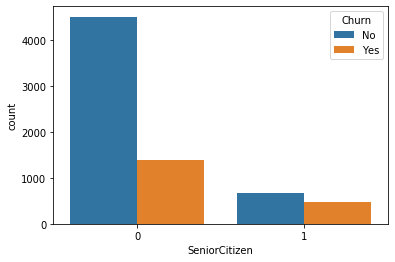

In [73]:
sns.countplot(dt['SeniorCitizen'],hue=dt['Churn'])

In [76]:
(dt.groupby(by=['SeniorCitizen','Churn'])['customerID'].count()/len(dt))*100

SeniorCitizen  Churn
0              No       64.006815
               Yes      19.778503
1              No        9.456198
               Yes       6.758484
Name: customerID, dtype: float64

__Observation__:
1. Our assumption was wrong about senior citizens. They do more churn right now the reason is unknown and the evidence is also not so significant. We have to revisit it from other angle (with combination of other features).

## Monthly charges

1. What is the distribution?

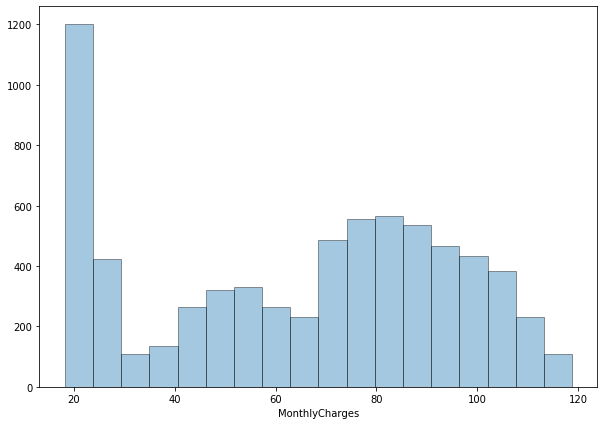

In [79]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(dt['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black'})

2. Distribution of churner and non-churners ?

In [80]:
churners = dt[dt['Churn']=='Yes']
non_churners = dt[dt['Churn']=='No']

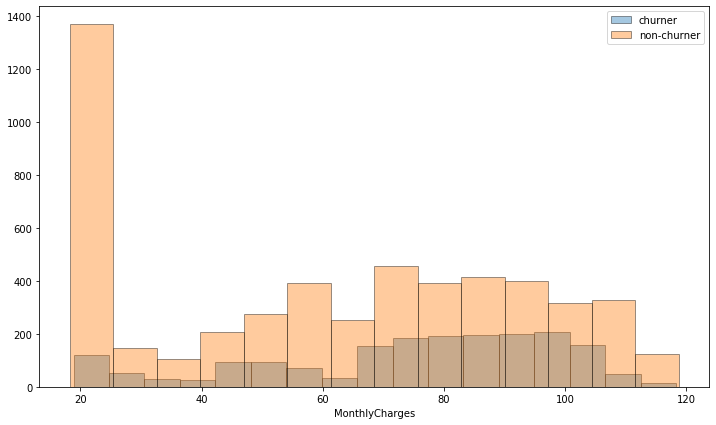

In [87]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black'})
sns.distplot(non_churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black'})
plt.legend(['churner','non-churner'])

Text(0.5, 1.0, 'Non-Churner Monthly charges')

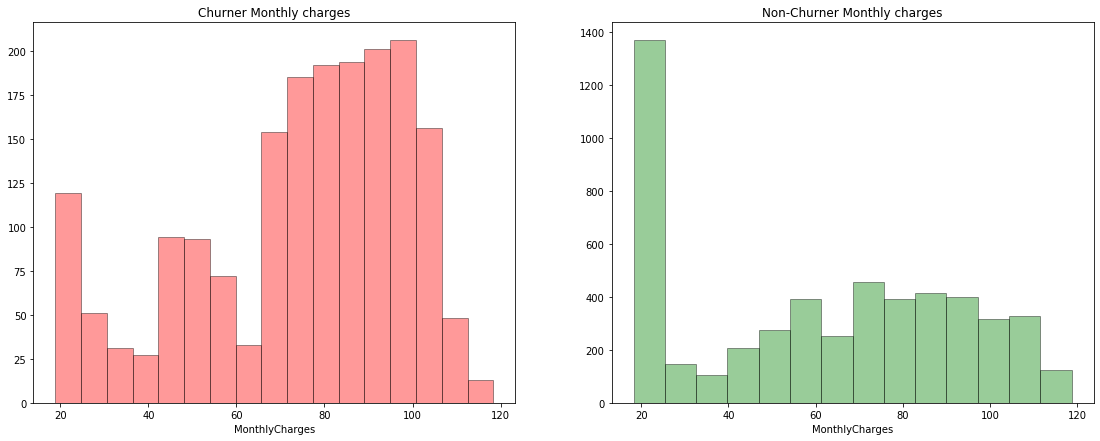

In [94]:
fig, ax = plt.subplots(ncols=2, figsize=(19,7))
sns.distplot(churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black','color':'red'}, ax=ax[0])
ax[0].set_title('Churner Monthly charges')
sns.distplot(non_churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black','color':'green'}, ax = ax[1])
ax[1].set_title('Non-Churner Monthly charges')

__Observation__:
1. High monthly chargers are one of the significant reason of churning. 
2. They assumption was right it is safe to say at the moment that in some cases (not all) in which monthly charges are high there is a high chance of churn? 

## Contract type

1. What is the distribution? 

In [96]:
(dt['Contract'].value_counts()/len(dt))*100

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

2. What is distribution of churner and non-churner with in each contract type? 

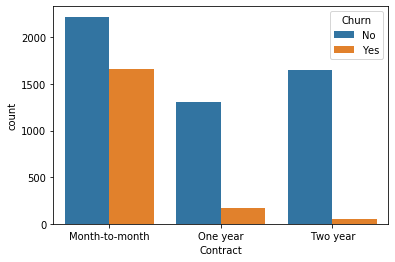

In [98]:
sns.countplot(dt['Contract'],hue=dt['Churn'])

__Observation:__
1. As suspect the longer contract often leave less space for churn. 

## Payment type

1. What is the distribution? 

In [99]:
(dt['PaymentMethod'].value_counts()/len(dt))*100

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

2. What is distribution of churner and non-churner with in each payment type? 

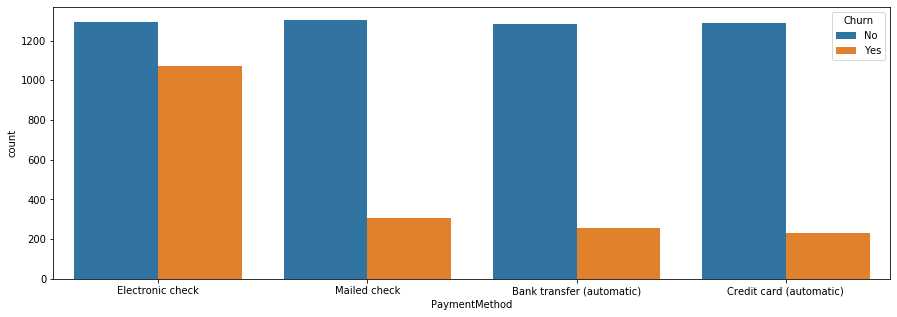

In [101]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(dt['PaymentMethod'],hue=dt['Churn'])

In [106]:
chuner = dt[dt['Churn']=='Yes']

In [107]:
agg = chuner.groupby(by=['PaymentMethod'])['customerID'].count().reset_index().rename(columns={'customerID':'count'})

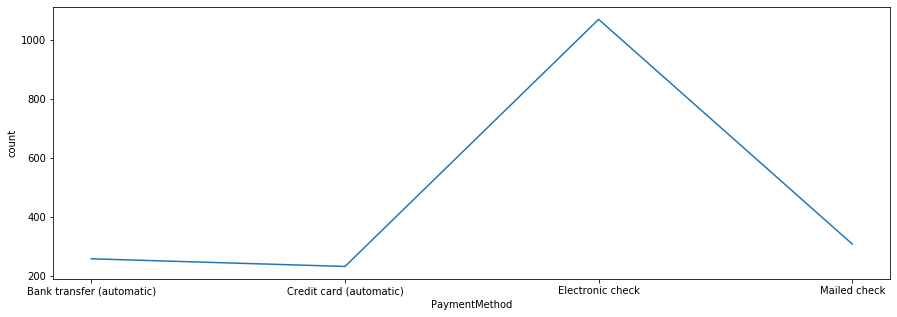

In [109]:
fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='PaymentMethod',y='count',markers='o', data=agg)

__Observation__: 
1. Electronic check has weird number churn cases. More reasoning with other features is required to understand why it happened. 
2. Whereas, credit card has the lowest percentage of churner. 

## Phone Service

1. What is the distribution? 

In [112]:
(dt['PhoneService'].value_counts()/len(dt))*100

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

2. What is percentage of churner in each group? 

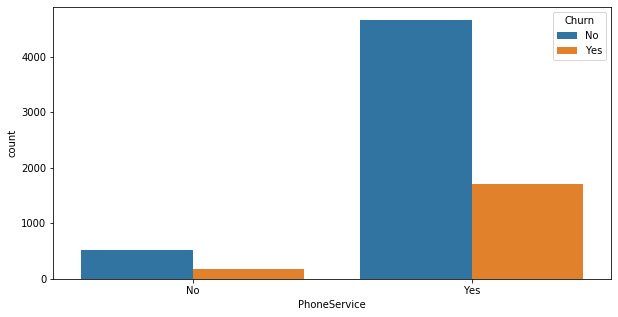

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(dt['PhoneService'], hue=dt['Churn'])

__Observation__:
1. Can't conclude anything because 90% percent of people are using phone service so churn suppose to be high there as well. 

## Internet Service

1. What is the distribution?

In [115]:
(dt['InternetService'].value_counts()/len(dt))*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

2. What is the percentage of churner in each group? 

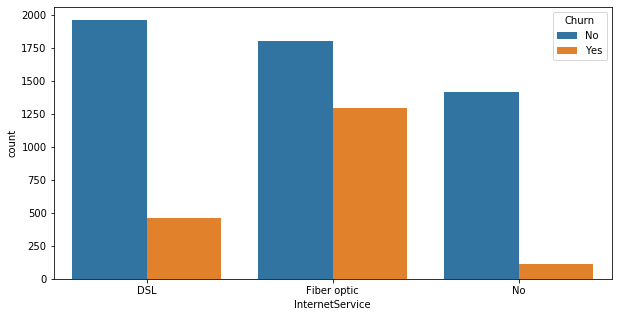

In [116]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(dt['InternetService'], hue=dt['Churn'])

__Observation__:
1. Can't conclude at the moment. Maybe fiber optics users are charge higher and which may lead to churn. 

## Further Questions:

1. What if the old customer (longer tenure) got a high monthly charges? Will he/she churn? how likely is that? 
2. Does senior citizen churn because of high monthly charges? i.e they can't afford it.
3. What if senior citizen is an old customer will they still churn? 
4. Those who have internet service (fiber optics) will they churn because the service is so expensive? 